In [2]:
%matplotlib inline

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imread_collection, imshow, imshow_collection
from scipy.ndimage import binary_opening
from scipy.ndimage.filters import convolve
from skimage.morphology import square
from skimage.filters import threshold_otsu
import requests
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords

C:\Users\nushi\AppData\Local\Temp\ipykernel_1720\690526982.py:6: DeprecationWarning: Please use `convolve` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import convolve


In [5]:
coffee = pd.read_csv("arabica_data_cleaned.csv")
coffee

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.00,2200.00,2075.00
1,2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.00,2200.00,2075.00
2,3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.00,1800.00,1700.00
3,4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.00,2200.00,2000.00
4,5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.00,2200.00,2075.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,1307,Arabica,juan carlos garcia lopez,Mexico,el centenario,NaN,"la esperanza, municipio juchique de ferrer, ve...",1104328663,terra mia,900,...,NaN,20,"September 17th, 2013",AMECAFE,59e396ad6e22a1c22b248f958e1da2bd8af85272,0eb4ee5b3f47b20b049548a2fd1e7d4a2b70d0a7,m,900.00,900.00,900.00
1307,1308,Arabica,myriam kaplan-pasternak,Haiti,200 farms,NaN,coeb koperativ ekselsyo basen (350 members),NaN,haiti coffee,~350m,...,Blue-Green,16,"May 24th, 2013",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,350.00,350.00,350.00
1308,1309,Arabica,"exportadora atlantic, s.a.",Nicaragua,finca las marías,017-053-0211/ 017-053-0212,beneficio atlantic condega,017-053-0211/ 017-053-0212,exportadora atlantic s.a,1100,...,Green,5,"June 6th, 2018",Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,m,1100.00,1100.00,1100.00
1309,1310,Arabica,juan luis alvarado romero,Guatemala,finca el limon,NaN,beneficio serben,11/853/165,unicafe,4650,...,Green,4,"May 24th, 2013",Asociacion Nacional Del Café,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,724f04ad10ed31dbb9d260f0dfd221ba48be8a95,ft,1417.32,1417.32,1417.32


In [8]:
(coffee.Balance - coffee.Balance.mean())/coffee.Balance.std() #Z-score

0        2.221164
1        2.221164
2        2.221164
3        1.802770
4        1.999661
          ...    
1306    -1.888938
1307    -2.085829
1308    -3.537902
1309    -2.085829
1310   -18.501627
Name: Balance, Length: 1311, dtype: float64

In [6]:
pd.qcut(coffee.Balance,5)   

0         (7.75, 8.75]
1         (7.75, 8.75]
2         (7.75, 8.75]
3         (7.75, 8.75]
4         (7.75, 8.75]
             ...      
1306    (-0.001, 7.25]
1307    (-0.001, 7.25]
1308    (-0.001, 7.25]
1309    (-0.001, 7.25]
1310    (-0.001, 7.25]
Name: Balance, Length: 1311, dtype: category
Categories (5, interval[float64, right]): [(-0.001, 7.25] < (7.25, 7.5] < (7.5, 7.58] < (7.58, 7.75] < (7.75, 8.75]]

In [9]:
coffee.Balance.nsmallest(5)

1310    0.00
1308    6.08
1303    6.17
1304    6.17
1305    6.17
Name: Balance, dtype: float64

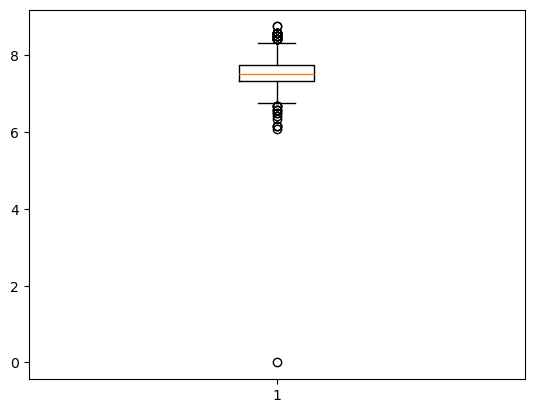

In [12]:
plt.boxplot(coffee.Balance)
plt.show()

In [7]:
nuclear = pd.read_csv("https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/boot/nuclear.csv", index_col = 0)

In [8]:
nuclear

,cost,date,t1,t2,cap,pr,ne,ct,bw,cum.n,pt
rownames,,,,,,,,,,,
1,460.05,68.58,14,46,687,0,1,0,0,14,0
2,452.99,67.33,10,73,1065,0,0,1,0,1,0
3,443.22,67.33,10,85,1065,1,0,1,0,1,0
4,652.32,68.00,11,67,1065,0,1,1,0,12,0
5,642.23,68.00,11,78,1065,1,1,1,0,12,0
6,345.39,67.92,13,51,514,0,1,1,0,3,0
7,272.37,68.17,12,50,822,0,0,0,0,5,0
8,317.21,68.42,14,59,457,0,0,0,0,1,0
9,457.12,68.42,15,55,822,1,0,0,0,5,0


In [6]:
nuclear.cost.mean()

461.5603125

In [16]:
nuclear[nuclear["ne"] == 1]["ne"].sum()

8

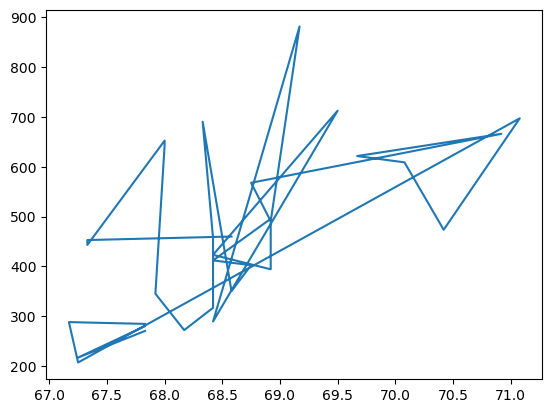

In [30]:
plt.plot(nuclear.date,nuclear.cost)
plt.show()

In [33]:
nuclear.cap.sort_values(ascending = False).max()

1130

In [37]:
burger = imread("burger.jpg")

In [41]:
burger.nbytes

783126

In [43]:
burger[:,:,0].mean(),burger[:,:,1].mean(),burger[:,:,2].mean()

(90.08790156373304, 84.07082002129926, 36.792577439645726)

In [76]:
burger_grayscale = 0.299 * burger[:,:,0] + 0.587 * burger[:,:,1] + 0.114 * burger[:,:,2]
mask_arr = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])
burger_conv = convolve(burger_grayscale, mask_arr)

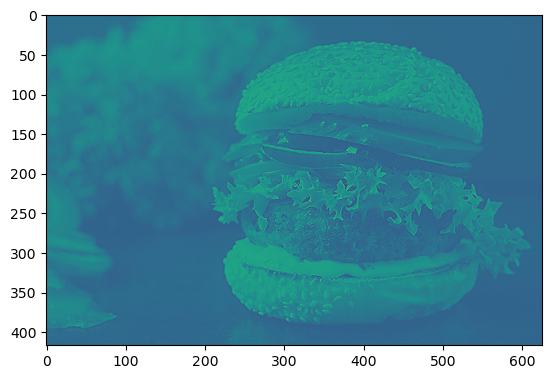

In [77]:
plt.imshow(burger_conv)

In [44]:
blue = burger[:,:,2]

In [59]:
blue

array([[50, 51, 53, ..., 23, 22, 22],
       [50, 52, 53, ..., 24, 22, 22],
       [51, 52, 53, ..., 24, 21, 21],
       ...,
       [20, 25, 29, ...,  4,  6,  5],
       [ 7, 12, 19, ..., 12,  9,  8],
       [14, 18, 17, ..., 24, 23, 24]], dtype=uint8)

In [61]:
blue_ch_thr = threshold_otsu(blue)

In [62]:
blue_binari = blue > blue_ch_thr

In [64]:
blue_binari

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [65]:
struct_img = square(3)

In [66]:
binary_opening(blue_ch, structure=struct_img).sum()

RuntimeError: structure and input must have same dimensionality

Language Models
Large language models (LLMs) are all the rage now. Very often, they use a simple method which allows them to work with very large sequences of text, "focusing" on specific parts of the inputs by weighting them; essentially - 1D convolution on a large scale. What is the name of this method?
Word2Vec; 
Memory; 
Stochastic gradient descent ;
Attention ;
Direct preference optimization;;  
Bi-directional embedding; 
Encoder-decoder ;
Transfer learning ;
Reinforcement learning from human feedback ;

In [88]:
pride = pd.read_fwf("https://www.gutenberg.org/files/1342/1342-0.txt")  #chetem file-a


In [103]:
pride.columns = ["text"] 
all_story = " ".join(pride.text.str.lower().ravel())

In [104]:
split_text = re.split(r'\W+',all_story)

In [113]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nushi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [119]:
words_lower = []
for w in split_text:
    if not w in stopwords.words("english"):
        words_lower.append(w)
#words_lower = split_text.apply(lambda word: [w.lower() for w in word ])

In [120]:
Counter(words_lower)

Counter({'mr': 807,
         'elizabeth': 645,
         'could': 530,
         'would': 482,
         'darcy': 430,
         'said': 406,
         'mrs': 353,
         'bennet': 339,
         'much': 335,
         'miss': 315,
         'must': 312,
         'bingley': 310,
         'jane': 302,
         'one': 290,
         'know': 241,
         'though': 238,
         'well': 230,
         'never': 228,
         'think': 222,
         'soon': 216,
         'sister': 216,
         'good': 208,
         'might': 206,
         'may': 203,
         'time': 201,
         'wickham': 200,
         'lady': 198,
         'little': 190,
         'collins': 190,
         'every': 185,
         'nothing': 185,
         'without': 177,
         'lydia': 176,
         'make': 169,
         'illustration': 163,
         'dear': 163,
         'shall': 162,
         'first': 160,
         'say': 160,
         'man': 157,
         'room': 153,
         'see': 153,
         'family': 152,
         'grea

In [109]:
Counter(split_text)["prejudice"]

11